In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("../data/misgrosi_job1108.csv")
df_density = pd.read_csv('../../density.csv')

In [2]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df['Stadt'] = df.apply(stadt, axis=1)
df.head()

,Unnamed: 0,Position,Company,Location,Job Type,Stadt,Post Code
0,0,Oma gesucht in Basel\r\nSilMa,SilMa,4056 Basel,Grosi & Opi,Basel,4056.0
1,1,Grosi gesucht in Hünenberg\r\nLuca2013,Luca2013,6331 Hünenberg,Grosi & Opi,Hünenberg,6331.0
2,2,Ein Herzens-Grosi gesucht zum Aufbau einer lie...,Calendula,8165 Schöfflisdorf,Grosi & Opi,Schöfflisdorf,8165.0
3,3,Wir suchen eine langfristige Ergänzung unseres...,Laura B.,8608 Bubikon,Grosi & Opi,Bubikon,8608.0
4,4,Grosi gesucht in Dübendorf\r\nTamaraa,Tamaraa,8600 Dübendorf,Babysitting,Dübendorf,8600.0


In [3]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df['Post Code'] = df.apply(post, axis=1)

In [4]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,1794.0,1
1,2000.0,2
2,2502.0,2
3,2503.0,2
4,2504.0,1
...,...,...
575,9642.0,1
576,60005.0,1
577,75059.0,1
578,79541.0,1


In [5]:
# Merge grouped by data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per_capita'] = df['Counts']/df['Population']
# Define urban column
df['region'] = 'unknown'
df.loc[df['Density']<400, 'region'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'region'] = 'suburb'
df.loc[df['Density']>1500, 'region'] = 'urban'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,Unnamed: 0,City,Region,Area,Population,Density,gig_per_capita,region
0,1794.0,1,569.0,NaN,Canton of Fribourg,3.795,677.0,178.392622,0.001477,rural
1,2000.0,2,764.0,Neuchâtel,Canton of Neuchâtel,31.600,33200.0,1050.632911,0.000060,suburb
2,2502.0,2,938.0,NaN,Canton of Bern,6.400,17803.0,2781.718750,0.000112,urban
3,2503.0,2,939.0,NaN,Canton of Bern,2.954,18295.0,6193.297224,0.000109,urban
4,2504.0,1,940.0,NaN,Canton of Bern,9.700,17751.0,1830.000000,0.000056,urban


In [6]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('region')['region'].count()
urban_count

region
rural     203
suburb    246
urban     121
Name: region, dtype: int64

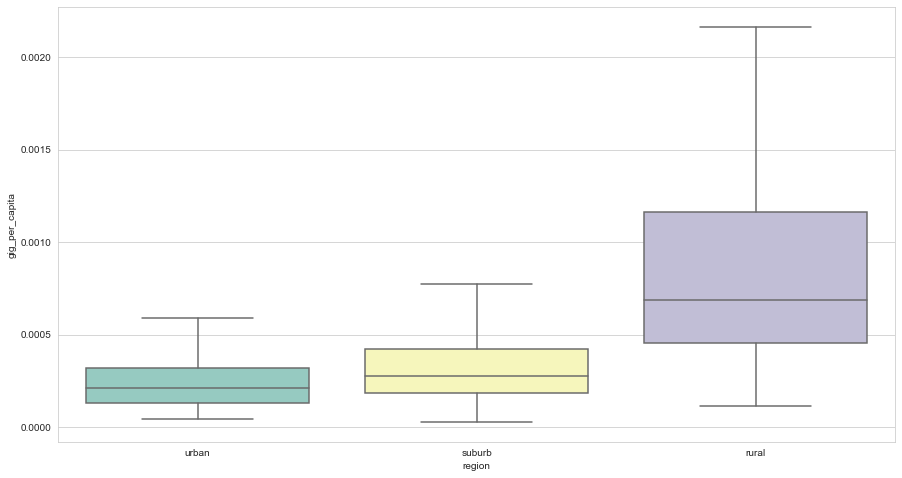

In [7]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region", y="gig_per_capita",               
data=df, palette="Set3",showfliers = False,order = ['urban','suburb','rural'])

In [8]:
urban = df[df["region"]=='urban']['gig_per_capita']
suburb = df[df["region"]=='suburb']['gig_per_capita']
rural = df[df["region"]=='rural']['gig_per_capita']

In [9]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 20)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

In [10]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 20, label = labels, range = [0,0.005])
    plt.xlabel('gig per capita')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

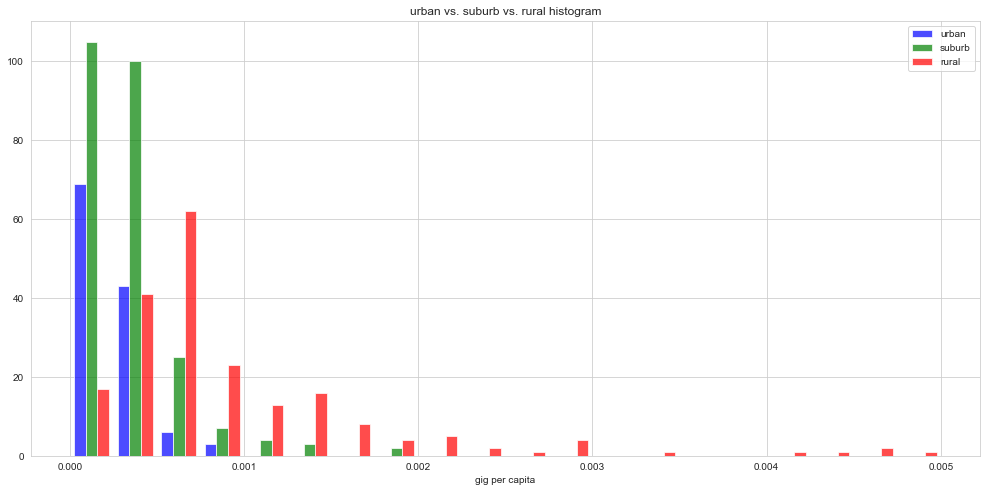

In [11]:
hist_all(['urban','suburb','rural'],urban,suburb,rural)

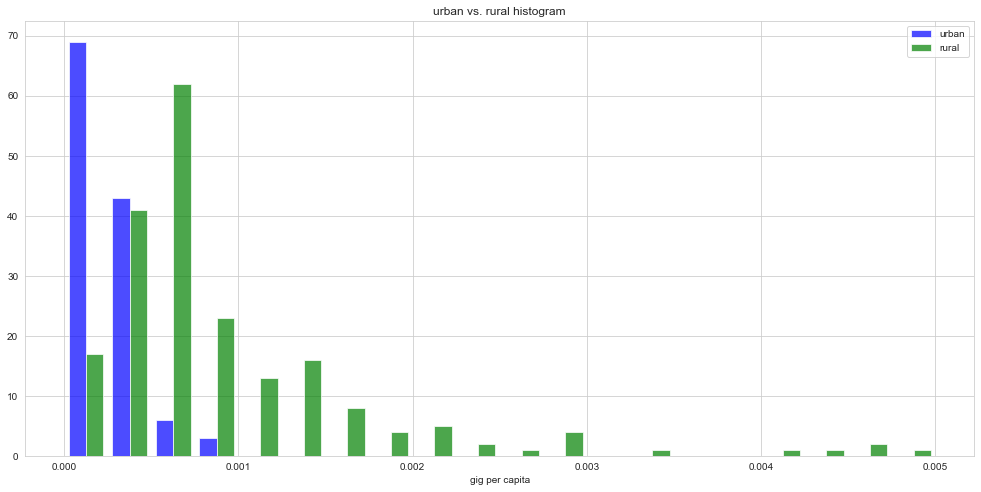

In [12]:
hist_all(['urban','rural'],urban,rural)

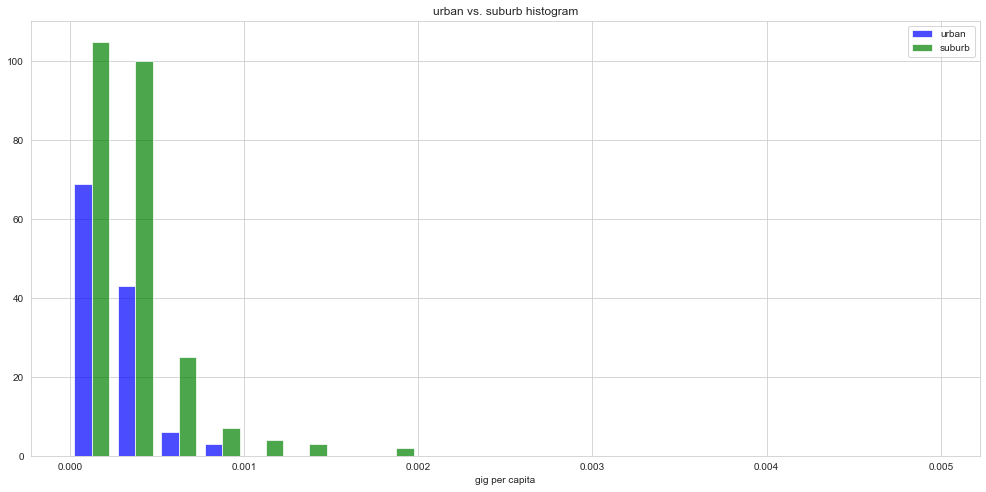

In [13]:
hist_all(['urban','suburb'],urban,suburb)

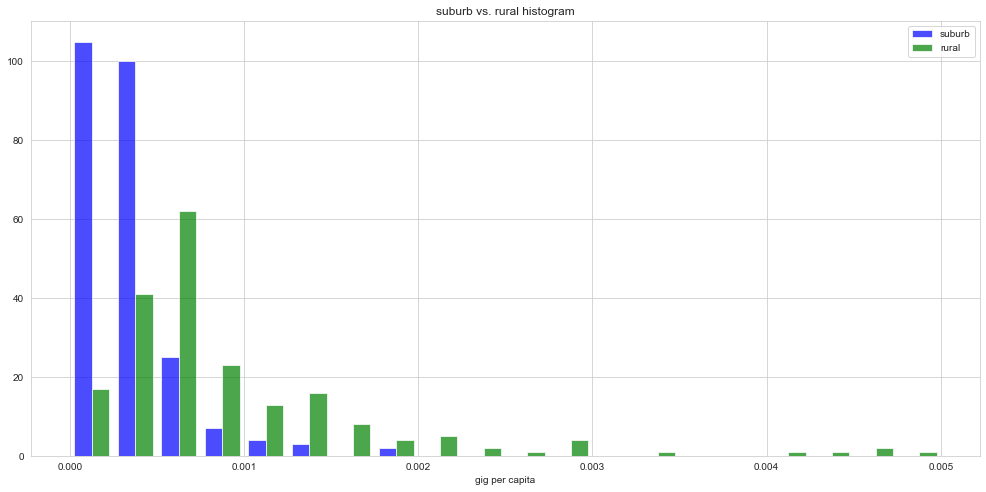

In [14]:
hist_all(['suburb','rural'],suburb,rural)

In [15]:
df_count

,Post Code,Counts
0,1794.0,1
1,2000.0,2
2,2502.0,2
3,2503.0,2
4,2504.0,1
...,...,...
575,9642.0,1
576,60005.0,1
577,75059.0,1
578,79541.0,1


In [16]:
df_count = df_density.merge(df_count,on = 'Post Code', how = 'left')
df_count['Counts'] = df_count['Counts'].fillna(0)
df_count = df_count.drop(['City','Region'],axis=1)
df_count = df_count.dropna(subset = ['Density','Population'])
df_count['gig_per_capita'] = 100*df_count['Counts']/df_count['Population']
df_count = df_count.rename(columns={'Counts': 'gig_num'})
df_count

,Unnamed: 0,Post Code,Area,Population,Density,gig_num,gig_per_capita
0,0,1000,14.100,4072.0,288.794326,0.0,0.0
3,3,1003,0.820,6707.0,8179.268293,0.0,0.0
4,4,1004,2.272,31230.0,13745.598592,0.0,0.0
5,5,1005,1.585,12386.0,7814.511041,0.0,0.0
6,6,1006,1.553,15391.0,9910.495815,0.0,0.0
...,...,...,...,...,...,...,...
3517,3517,9411,5.100,701.0,137.450980,0.0,0.0
3519,3519,9426,1.381,931.0,674.149167,0.0,0.0
3520,3520,9427,6.900,1846.0,267.536232,0.0,0.0
3521,3521,9428,7.000,1995.0,285.000000,0.0,0.0


In [17]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title('Misgrosi')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('log(density)')
    ax.set_ylabel('log(gig_per_capita)')

In [24]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(np.log(df[col1].astype('float')), np.log(df[col2].astype('float')))
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: -0.6400930211721907, p value: 4.987987823298771e-67
Spearman rho: -0.6356536590996967, p value: 7.562648954016238e-66
kendall tau: -0.4555265707231684, p value: 1.830897947999579e-59


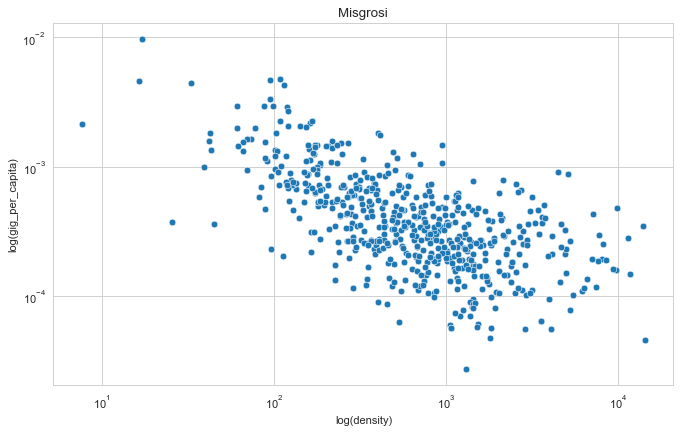

In [25]:
draw_corr(df,'Density','gig_per_capita')

/Users/guan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/guan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4040: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: array must not contain infs or NaNs

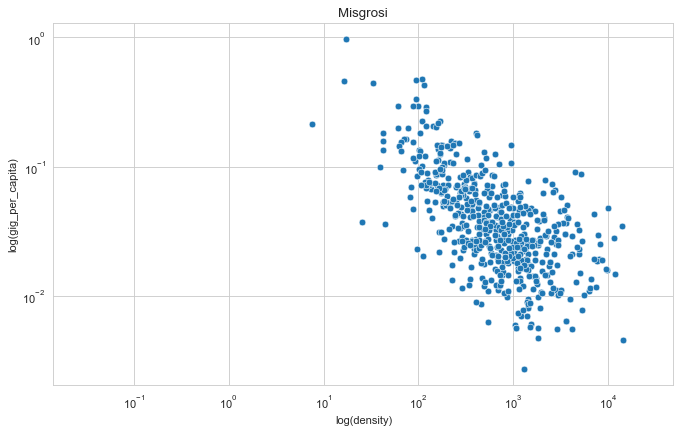

In [20]:
draw_corr(df_count,'Density','gig_per_capita')

In [21]:
df_count

,Unnamed: 0,Post Code,Area,Population,Density,gig_num,gig_per_capita
0,0,1000,14.100,4072.0,288.794326,0.0,0.0
3,3,1003,0.820,6707.0,8179.268293,0.0,0.0
4,4,1004,2.272,31230.0,13745.598592,0.0,0.0
5,5,1005,1.585,12386.0,7814.511041,0.0,0.0
6,6,1006,1.553,15391.0,9910.495815,0.0,0.0
...,...,...,...,...,...,...,...
3517,3517,9411,5.100,701.0,137.450980,0.0,0.0
3519,3519,9426,1.381,931.0,674.149167,0.0,0.0
3520,3520,9427,6.900,1846.0,267.536232,0.0,0.0
3521,3521,9428,7.000,1995.0,285.000000,0.0,0.0
